# BINARY CLASSIFICATION

This notebook test deep_learn package for binary classification using kaggle's [Porto Seguro’s Safe Driver Prediction Dataset](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction).

**Import deep_learn package**

In [1]:
try:
    from deep_learn.nn import ann
except:
    from config import *
    append_path('../')
    from deep_learn.nn import ann

**Import neccessary package**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from config import *
append_path('../')

## 1. Load and preprocess data

In [3]:
data = pd.read_csv("./data/train.csv")

In [4]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


**Do a train test split**

In [5]:
train_data, test_data = train_test_split(data, test_size = 0.1, random_state = 0)

In [6]:
train_data.shape

(535690, 59)

In [7]:
test_data.shape

(59522, 59)

**A function to extract feature matrix and output vector**

In [8]:
def get_xy_data(dataframe, features = None, output = None):

    '''a function for parsing the feature matrix and output array from a pandas dataframe'''

    # to ignore pandas warning
    import warnings
    warnings.filterwarnings('ignore')

    # import numpy
    import numpy as np

    # if no featues are given then just return the a numpy matrix of the dataframe
    if features == None:
        return dataframe.as_matrix()

    # extract the feature matrix and convert it to numpy array
    X = dataframe[features].as_matrix()

    # if there is no output
    if output == None:
        return X
    # if the output vector is wanted by the user
    else:
        # extracting the output columns and converting it to numpy array
        y = dataframe[output].as_matrix()
        y = np.reshape(y, (-1,1))
        # returning the feature matrix and output vector
        return (X, y)

**Features and output of the model**

In [9]:
features = data.columns.tolist()
features.remove('id')
output = "target"
features.remove(output)

**Extract X y data for train and test set**

In [10]:
X_train, Y_train = get_xy_data(train_data, features=features, output=output)
X_test, Y_test = get_xy_data(test_data, features=features, output=output)

## 2. Train Neural Neural Network model

**Neural network architecture**

In [11]:
layers_dims = [57, 57*2,57*4,57*2,57,1]

**Create a nn model object**

In [12]:
model = ann(layers_dims=layers_dims)

**Hyperparameters of the model**

In [13]:
batch_size = 1000
learning_rate = 0.0001
num_iterations = 16000

**Fit the model**

In [14]:
model.fit(X_train, Y_train, X_test, Y_test, batch_size,
          learning_rate = learning_rate, 
          num_iterations = num_iterations, print_cost=True, random_seed = 0)

Cost after iteration 0: 1.348082
Cost after iteration 100: 1.265473
Cost after iteration 200: 1.188089
Cost after iteration 300: 1.117496
Cost after iteration 400: 1.044909
Cost after iteration 500: 0.979954
Cost after iteration 600: 0.926057
Cost after iteration 700: 0.873102
Cost after iteration 800: 0.826064
Cost after iteration 900: 0.778396
Cost after iteration 1000: 0.734988
Cost after iteration 1100: 0.697507
Cost after iteration 1200: 0.662756
Cost after iteration 1300: 0.629184
Cost after iteration 1400: 0.598900
Cost after iteration 1500: 0.572355
Cost after iteration 1600: 0.548409
Cost after iteration 1700: 0.526223
Cost after iteration 1800: 0.500857
Cost after iteration 1900: 0.481424
Cost after iteration 2000: 0.461211
Cost after iteration 2100: 0.450442
Cost after iteration 2200: 0.429388
Cost after iteration 2300: 0.421333
Cost after iteration 2400: 0.404208
Cost after iteration 2500: 0.397481
Cost after iteration 2600: 0.368496
Cost after iteration 2700: 0.372714
Cost

**Plot of Cost vs Iteration**

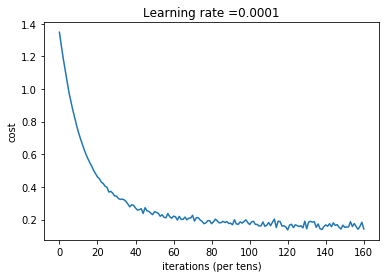

In [15]:
# plot the cost
plt.plot(np.squeeze(model.costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()